In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
X = data.data  # Features (569 samples x 30 features)
y = data.target  # Labels (0 = malignant, 1 = benign)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # Ensures reproducible results
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform test data using training params

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(12, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    verbose=1  # Show progress bar during training
)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7420 - loss: 0.5629
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9189 - loss: 0.3023
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9326 - loss: 0.1805
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.1650
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0924
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9791 - loss: 0.0949
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.0731
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0555
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0557
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0606
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.0608
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - lo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9651 - loss: 0.1320 

Final Test Accuracy: 96.49%


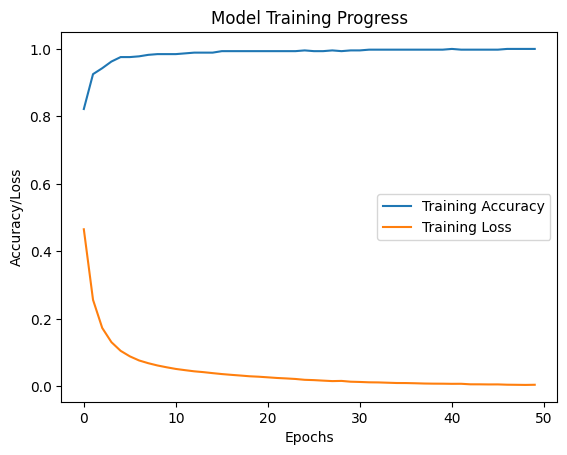

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [ ]:
print("\n--- Predicting Single Sample ---")



--- Predicting Single Sample ---


In [ ]:
single_sample_index = 10  # Change this index to test different samples from X_test

In [ ]:
single_sample = X_test[single_sample_index].reshape(1, -1)  # Reshape for prediction

In [ ]:
prediction = model.predict(single_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [ ]:
predicted_class = int(prediction[0][0] > 0.5)

In [ ]:
print(f"Predicted Probability: {prediction[0][0]:.4f}")
print(f"Predicted Class: {'Benign' if predicted_class == 1 else 'Malignant'}")

Predicted Probability: 0.9012
Predicted Class: Benign
